# Advanced Lane Finding
##  Camera Calibration


Success: Calibrated camera.


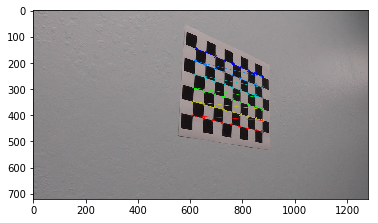

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob
import pickle


# prepare object points
nx = 9# Number of inside corners in x
ny = 6# Number of inside corners in y

# Make a list of calibration images
images = glob.glob("camera_cal/calibration*.jpg")
# Create empty list of objPoints
objpoints = []
imgpoints = []
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x, y coordinates

for filename in images:

    img = cv2.imread(filename)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
print('Success: Calibrated camera.')

##  Undistort an image

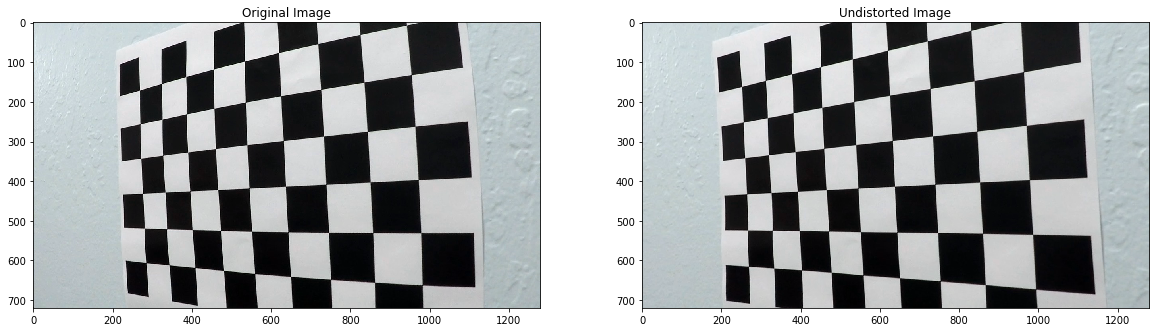

In [7]:


def undistort(img_, mtx_, dist_):
    return cv2.undistort(img_, mtx_, dist_, None, mtx_)

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration4.jpg')
img_undistort = undistort(img,mtx, dist)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image')
ax2.imshow(img_undistort)
ax2.set_title('Undistorted Image')